# A/B Testing Analysis: Free Trial Conversion Optimization

## Background

Our company ABC wants to improve free trial conversion rates on our landing page. The current signup form is lengthy and we believe a simplified version will increase conversions. We designed an experiment where 50% of visitors are randomly assigned to see the current form (control), while 50% see the new streamlined form (treatment).

In this simulation, control users have a 25% conversion rate and we expect the treatment to drive a relative increase of 12%.

In [3]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(98765)

## Simulate Data

In [5]:
# experiment setup
total_users = 80000

# randomly assign users to groups
user_groups = np.random.choice([0,1], size=total_users, p=[0.5,0.5])

# conversion rates
baseline_rate = 0.25
relative_improvement = 0.12
new_rate = baseline_rate * (1 + relative_improvement)

# generate conversion outcomes based on group
conversion_outcomes = np.where(user_groups==0, 
                              np.random.choice([0,1], size=total_users, p=[1-baseline_rate, baseline_rate]), 
                              np.random.choice([0,1], size=total_users, p=[1-new_rate, new_rate]))

# create final dataset
df = pd.DataFrame({
    'group': user_groups,
    'signup': conversion_outcomes
})

print(df.groupby(['group'])['signup'].agg(['count','mean']).round(3))

       count   mean
group              
0      39981  0.251
1      40019  0.279


## Visualization

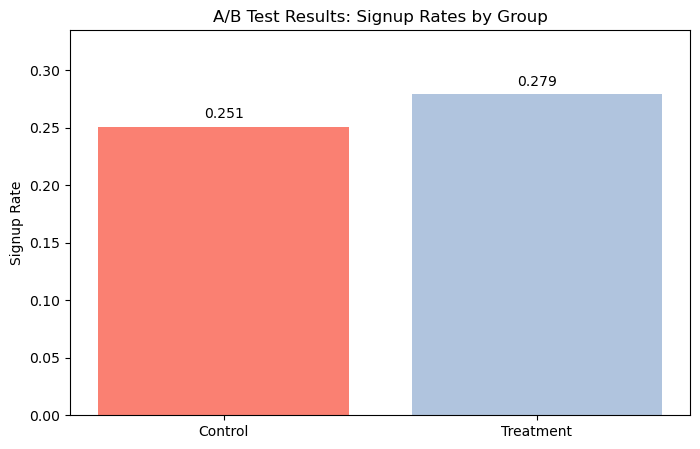

In [7]:
# Simple bar chart comparing conversion rates
group_results = df.groupby('group')['signup'].mean()

plt.figure(figsize=(8,5))
bars = plt.bar(['Control', 'Treatment'], group_results, color=['salmon', 'lightsteelblue'])
plt.ylabel('Signup Rate')
plt.title('A/B Test Results: Signup Rates by Group')
plt.ylim(0, max(group_results) * 1.2)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom')

plt.show()

## Statistical Analysis - Linear Regression

In [9]:
import statsmodels.formula.api as smf 

regression_formula = 'signup ~ group'
regression_model = smf.ols(regression_formula, df).fit()

print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 signup   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     82.05
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.36e-19
Time:                        13:15:20   Log-Likelihood:                -48023.
No. Observations:               80000   AIC:                         9.605e+04
Df Residuals:                   79998   BIC:                         9.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2507      0.002    113.669      0.0

## Extract Key Results

In [11]:
print("The estimated absolute impact is: {0:.2f}% \
      \nThe estimated relative impact is {1:.2f}% \
      \nThe t-statistic is {2:.1f} \
      \nThe p-value is {3:.3f}%".format(
        100*regression_model.params['group'],
        100*regression_model.params['group']/regression_model.params['Intercept'],
        regression_model.tvalues['group'],
        100*regression_model.pvalues['group']
))

The estimated absolute impact is: 2.82%       
The estimated relative impact is 11.27%       
The t-statistic is 9.1       
The p-value is 0.000%


## T-Test Verification

In [13]:
from scipy.stats import ttest_ind 

group_new = df[df['group']==1]['signup']
group_original = df[df['group']==0]['signup']

t_statistic, p_val = ttest_ind(group_new, group_original)

print(f"t-statistic: {round(t_statistic,2)}")
print(f"p-value: {round(p_val,4)}")

t-statistic: 9.06
p-value: 0.0


## Conclusion

We simulated an experiment where the true treatment effect was designed to increase conversion rates by 12% relative to a baseline of 25%. Our analysis showed:

- **Control group conversion rate**: 25.1%
- **Treatment group conversion rate**: 27.9%  
- **Estimated relative impact**: 11.27% (close to our expected 12%)
- **Absolute impact**: 2.82 percentage points
- **Statistical significance**: Highly significant (p < 0.001)

The results demonstrate that the new streamlined form significantly outperforms the original form, with the observed effect very close to our expected improvement. The high statistical significance (t-statistic = 9.06) gives us confidence that this is a real improvement, not due to random chance.